In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys, os
import math
from scipy import special
import scipy
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.ffmpeg_path']='‪C:\\FFmpeg\bin\ffmpeg.exe'

erf = special.erf

In [48]:
x = np.linspace(-3,3,1000)
def Heat(x,t, alpha = 1):
    q = np.sqrt(4*alpha*t)
    return 1/2*(erf((1/2-x)/(q))-erf((-1/2-x)/(q)))

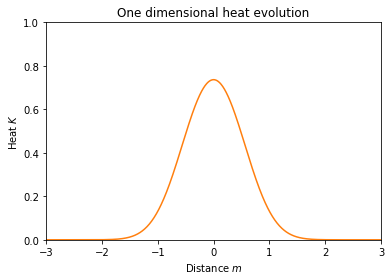

In [52]:
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(0, 1), title = "One dimensional heat evolution")
line, = ax.plot([], [], lw=1)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    i = i*0.01
    if i != 0:
        y = Heat(x, i)
        line.set_data(x, y)
        line.set_label(f"t = {round(i,3)}")
        plt.legend(bbox_to_anchor=(1, 0.5))
    else:
        pass
    return line,
""""
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=50, blit=False)
ax.grid()
plt.xlabel(r"$x-axis$")
plt.ylabel(r"$u(x,t)$")

anim.save('Task1.gif', fps=10, extra_args=['-vcodec', 'libx264'],
         writer = 'pillow')

plt.show()
"""
plt.plot(x, Heat(x, 0.1))
plt.ylabel(r"Heat $K$")
plt.xlabel(r"Distance $m$")
plt.savefig("Task1.png")
plt.show()

# Task 2
## We begin by making a meshgrid of a specific size

In [16]:
import time
global X,Y
L = 250
Boundary = 6360*10**3
x, y = np.linspace(0,Boundary,L), np.linspace(0,Boundary,L).reshape(-1,1)
X,Y = np.meshgrid(x,y, indexing = "xy")

# This works
### This produces a both a plot and an animation.
My problem is that it's not centered where I want it, it also scales with $L$ which it should not.

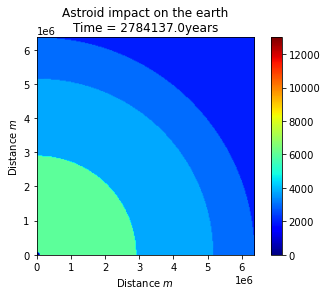

Time : 22.078679084777832 s


In [20]:
start = time.time()
fig = plt.figure()
def Heat3(x,y,Temp, alpha = np.ones((L,L)), Time = 0.0001):
    """ Returns the temperature at a time t, given a position (x,y)"""
    l = np.sqrt(2)
    q = np.sqrt(400*alpha*Time)
    r = np.sqrt((x-6360e3/l)**2+(y-6360e3/l)**2)
    k1 = 1e5 - r
    k2 = -1e5 - r
    return 10000*np.exp(-Time/(4.4e13))*(1/2*(erf(k1/q)-erf(k2/q)))+Temp

def Initialize(x,y, time=0.0000001):
    time = time* 4.4e11
    T = np.zeros((L,L))
    Alpha = np.zeros((L,L))
    R1 = 6360e3
    R2 = 5150e3
    R3 = 2890e3
    R4 = 60e3
    Radii = [R4,R3,R2,R1]
    Temperatures = [6000,3800, 3000, 2000]
    a = [5e-3,3.7e-7, 5.8e-4,2.0e-3]#2.0e-3
    r = np.sqrt(x**2+y**2)
    for i in range(len(Radii)):
        T[r>=Radii[i]] = Temperatures[i]
        Alpha[r>=Radii[i]] = a[i]
    Alpha = np.ones((L,L))*0.0000001 + Alpha
    Temp = Heat3(x,y,T, Time = time,alpha = Alpha)
    return Temp

cax = plt.imshow(Initialize(X,Y),extent = [0,6360e3,0,6360e3], 
                origin = "lower", animated=False, cmap = "jet", 
                 interpolation = "bilinear")

def updatefig3(*args):
    i = np.array(args[0])+0.000001
    if i != 0:
        a = Initialize(X, Y, i)
        cax.set_array(a)
        plt.title(f"Astroid impact on the earth\nTime = {round((i*4.4e11)/(60**2*24*7*52),0)}years")
        plt.xlabel(r"Distance $m$")
        plt.ylabel(r"Distance $m$")
        return fig,
    else:
        pass

ani = FuncAnimation(fig, updatefig3, interval=1, frames = 200, blit=True)
plt.colorbar()
#This typ-loop tries to save the file, and depending on which machine you're using
#the saving will work and save the corresponding .gif-file.
try:
    ani.save('Task3windows.gif', fps=20, writer = 'pillow', extra_args=['-vcodec', 'libx264'])
except:
    ani.save('Task3Mac.gif', fps=20, writer = 'pillow')

plt.show()
print("Time :", time.time()-start, "s")

def Frame1():
    cax = plt.imshow(Initialize(X,Y, time = 1),extent = [0,6360e3,0,6360e3], 
                origin = "lower", animated=False, cmap = "jet", 
                 interpolation = "bilinear")
    plt.colorbar()
    plt.title(f"Astroid impact on the earth\nTime = {round((10**4)/(60**2*24*7*52),0)}years")
    plt.xlabel(r"Distance $m$")
    plt.ylabel(r"Distance $m$")
    plt.savefig("Task3mac.png")
#Frame1()

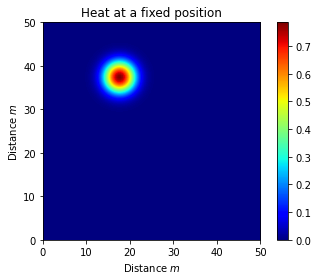

In [11]:
L = 100
fig = plt.figure()
xlist = np.linspace(0,50, L); ylist = np.linspace(0,50,L)
XX, YY = np.meshgrid(xlist, ylist)
def Heat4(x, y, t, alpha = 2):
    r = np.sqrt((17.5-x)**2+(37.5-y)**2)
    k1 = 5/2 - r
    k2 = -5/2 - r
    q = np.sqrt(4*alpha * t)
    return 1/2*(erf(k1/q)-erf(k2/q))

def animate(t):
    t+=0.1
    u = Heat4(XX, YY ,t)
    cax.set_array(u)
    plt.title(f"Heat at a fixed position, \nTime = {round(t,0)/10}s")
    plt.xlabel(r"Distance $m$")
    plt.ylabel(r"Distance $m$")
    return fig,

"""
cax = plt.imshow(Heat4(XX,YY, t = 0.0001),extent = [0, 50,0,50], 
                origin = "lower", animated=True, cmap = "jet", 
                 interpolation = "bilinear")

ani = FuncAnimation(fig, animate, interval=1, frames = 200, blit=True)
plt.colorbar()
ani.save('Task2Mac.gif', fps=20, writer = 'pillow')
plt.show()
"""
cax = plt.imshow(Heat4(XX,YY, t = 1),extent = [0, 50,0,50], 
                origin = "lower", animated=False, cmap = "jet", 
                 interpolation = "bilinear")
plt.colorbar()
plt.title("Heat at a fixed position")
plt.xlabel(r"Distance $m$")
plt.ylabel(r"Distance $m$")
plt.savefig("Task2Mac.png")
plt.show()